In [81]:
!pip install networkx

In [82]:
!pip install powerlaw

In [83]:
!pip install --upgrade networkx

In [84]:
import networkx as nx  # Граф (сүлжээ) үүсгэх, боловсруулах сан
import warnings  # Анхааруулга дарах сан
import pandas as pd  # Өгөгдөл боловсруулах сан (энэ кодонд ашиглагдахгүй байна)
import numpy as np  # Тоон өгөгдөлтэй ажиллах сан
import matplotlib.pyplot as plt  # График дүрслэл хийх сан
import powerlaw  # Хүчний хуулийн тархалтыг шинжлэх сан
%matplotlib inline
# Jupyter Notebook дээр графикийг шууд харуулах тохиргоо

def plot_dist(G):  # Графын зэрэг (degree) тархалтыг дүрслэх функц
    M = nx.to_scipy_sparse_array(G)  # Графыг сийрэг матриц (sparse matrix) болгон хувиргах
    xmin = min([d[1] for d in G.degree()])  # Граф дахь оройн хамгийн бага зэргийн утгыг олох
    indegrees = M.sum(0).A[0]  # Матрицын мөрүүдийн нийлбэрийг авснаар оройн зэргийг тодорхойлох
    degree = np.bincount(indegrees)  # Орой бүрийн зэргийн тоо хэмжээ хэд байгааг тоолох
    fit = powerlaw.Fit(np.array(degree) + 1, fit_method='KS')  # Power law тохиргоо хийж, өгөгдөлд нийцүүлэх

    fig = plt.figure(figsize=(16, 6))  # 16x6 хэмжээтэй дүрслэлийн самбар үүсгэх

    """ Plot Distribution (Зэрэг тархалтын график) """
    plt.subplot(1, 3, 1)  # 1-р графикийн байрлалыг тодорхойлох (3-н багана, 1-р байрлал)
    plt.plot(range(len(degree)), degree, 'b.')  # Цэнхэр цэгүүдээр зэрэг тархалтыг дүрслэх
    plt.loglog()  # X болон Y тэнхлэгийг лог масштабаар харуулах
    plt.xlim((min(degree), max(degree)))  # X тэнхлэгийн хязгаарыг тохируулах
    plt.xlabel('Degree')  # X тэнхлэгийн нэрийг "Degree" гэж тодорхойлох
    plt.ylabel('P(k)')  # Y тэнхлэгийн нэрийг "P(k)" гэж тодорхойлох

    """ Plot CDF (Хуримтлагдсан тархалтын функц - CDF) """
    plt.subplot(1, 3, 2)  # 2-р графикийн байрлалыг тодорхойлох (3-н багана, 2-р байрлал)
    fit.plot_cdf()  # CDF (Cumulative Distribution Function) буюу хуримтлагдсан тархалтыг зурах
    plt.xlabel("Degree")  # X тэнхлэгийн нэрийг "Degree" гэж тодорхойлох
    plt.ylabel('CDF')  # Y тэнхлэгийн нэрийг "CDF" гэж тодорхойлох

    """ Plot CCDF (Комплементар хуримтлагдсан тархалтын функц - CCDF) """
    plt.subplot(1, 3, 3)  # 3-р графикийн байрлалыг тодорхойлох (3-н багана, 3-р байрлал)
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')  # PDF (Probability Density Function) улаан тасархай шугамаар дүрслэх
    fit.plot_ccdf()  # CCDF (Complementary Cumulative Distribution Function) буюу эсрэг хуримтлагдсан тархалтыг зурах
    plt.ylabel('CCDF')  # Y тэнхлэгийн нэрийг "CCDF" гэж тодорхойлох
    plt.xlabel('Degree')  # X тэнхлэгийн нэрийг "Degree" гэж тодорхойлох
    plt.tight_layout()  # Графикуудын байрлалыг сайжруулах, хоорондын зайг зөв тохируулах
    plt.show()  # Графикийг дэлгэцэнд харуулах

    print(f'alpha={fit.power_law.alpha + 1} sigma={fit.power_law.sigma}')  # Хүчний хуулийн (Power Law) параметрүүдийг хэвлэх


m = 7: Сүлжээнд шинэ орой нэмэгдэх үед тэр нь 7 холбоос (edge) үүсгэнэ.
nx.barabasi_albert_graph(300, m): Барбаши-Альберт (BA) загвар ашиглан 300 оройтой граф үүсгэнэ. Энэ загвар нь scale-free network буюу зарим цөөн тооны орой олон холбоостой байдаг шинж чанартай.
nx.draw(ba): Үүсгэсэн графыг дүрслэнэ.

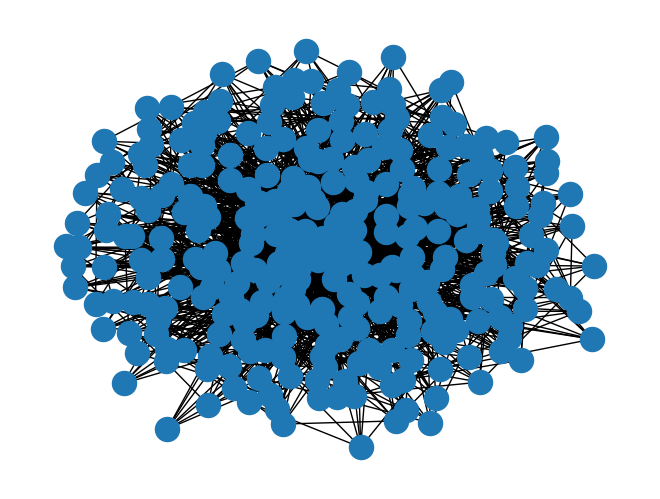

In [85]:
m = 7  # Шинээр нэмэгдэж буй орой (node) бүрийн холбогдох холбоосын тоо
ba = nx.barabasi_albert_graph(300, m)  # Барбаши-Альбертын загвараар 300 оройтой граф үүсгэх
nx.draw(ba)  # Графыг дүрслэх

3 төрлийн график үүсгэнэ:

Зэрэг тархалт (Degree Distribution)
Графын оройн (node) зэргийн тархалтыг дүрслэнэ.
Хуримтлагдсан тархалтын функц (CDF)
Графын зэрэг хэрхэн хуримтлагдаж байгааг үзүүлнэ.
Комплементар хуримтлагдсан тархалтын функц (CCDF)
Power law тохиргоо хэрхэн таарч байгааг харуулна.
 Эцсийн үр дүн:

alpha нь power-law тархалтын хэмжүүрийг харуулна.
sigma нь тохирлын алдааны хэмжүүр юм.

Calculating best minimal value for power law fit


<ipython-input-86-954c216ac553>:25: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim((min(degree), max(degree)))  # X тэнхлэгийн хязгаарыг тохируулах


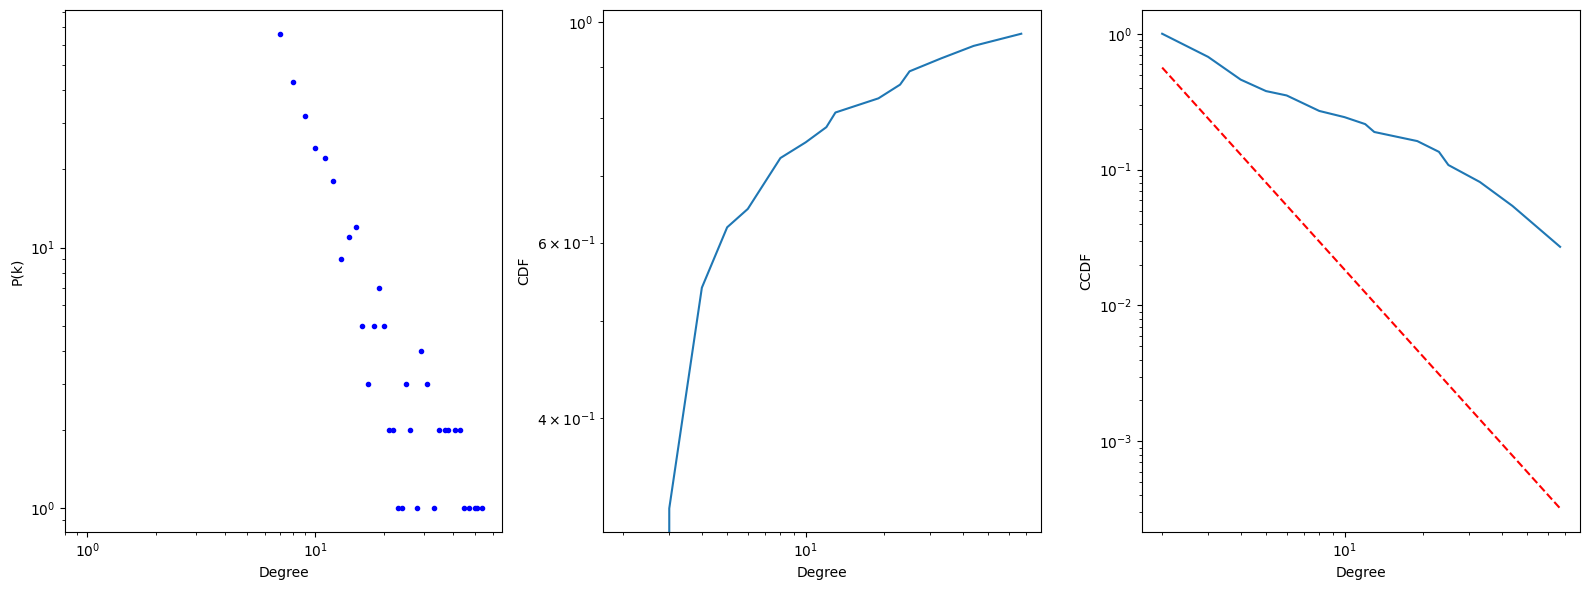

alpha=3.1273648111616557 sigma=0.18533763327867156


In [86]:
def plot_dist(G):  # Графын зэрэг (degree) тархалтыг дүрслэх функц
    # Графыг сийрэг матриц (sparse matrix) болгон хувиргах
    M = nx.to_scipy_sparse_array(G)

    # Графын хамгийн бага зэргийн (degree) утгыг олох
    xmin = min([d[1] for d in G.degree()])

    # Матрицын мөрүүдийн нийлбэрийг авч орой (node)-н зэргийг тодорхойлох
    # `.A[0]`-ийг орлуулж, `astype(int).reshape(-1)` ашиглаж массивыг зөв хэлбэрт оруулсан
    indegrees = M.sum(0).astype(int).reshape(-1)

    # Зэрэг (degree)-ийн давтамжийг тоолох
    degree = np.bincount(indegrees)

    # Power law тохиргоо хийх (Жишээ нь, зэрэг тархалтын `alpha`, `sigma`-г тодорхойлох)
    fit = powerlaw.Fit(np.array(degree) + 1, fit_method='KS')

    # 16x6 хэмжээтэй зураг үүсгэх
    fig = plt.figure(figsize=(16, 6))

    """ Plot Distribution (Зэрэг тархалтын график) """
    plt.subplot(1, 3, 1)  # 1-р графикийн байрлал (3-н багана, 1-р байрлал)
    plt.plot(range(len(degree)), degree, 'b.')  # Цэнхэр цэгүүдээр зэрэг тархалтыг дүрслэх
    plt.loglog()  # X болон Y тэнхлэгийг лог масштабаар харуулах
    plt.xlim((min(degree), max(degree)))  # X тэнхлэгийн хязгаарыг тохируулах
    plt.xlabel('Degree')  # X тэнхлэгийн нэрийг "Degree" гэж тодорхойлох
    plt.ylabel('P(k)')  # Y тэнхлэгийн нэрийг "P(k)" гэж тодорхойлох

    """ Plot CDF (Хуримтлагдсан тархалтын функц - CDF) """
    plt.subplot(1, 3, 2)  # 2-р графикийн байрлал
    fit.plot_cdf()  # CDF буюу хуримтлагдсан тархалтыг зурах
    plt.xlabel("Degree")  # X тэнхлэгийн нэрийг "Degree" гэж тодорхойлох
    plt.ylabel('CDF')  # Y тэнхлэгийн нэрийг "CDF" гэж тодорхойлох

    """ Plot CCDF (Комплементар хуримтлагдсан тархалтын функц - CCDF) """
    plt.subplot(1, 3, 3)  # 3-р графикийн байрлал
    fit.power_law.plot_pdf(color='r', linestyle='--', label='fit ccdf')  # PDF улаан тасархай шугамаар дүрслэх
    fit.plot_ccdf()  # CCDF буюу эсрэг хуримтлагдсан тархалтыг зурах
    plt.ylabel('CCDF')  # Y тэнхлэгийн нэрийг "CCDF" гэж тодорхойлох
    plt.xlabel('Degree')  # X тэнхлэгийн нэрийг "Degree" гэж тодорхойлох
    plt.tight_layout()  # Графикуудын байрлалыг сайжруулах
    plt.show()  # Графикуудыг дэлгэцэнд харуулах

    # Power law-ийн үндсэн параметрүүдийг хэвлэх (alpha, sigma)
    print(f'alpha={fit.power_law.alpha + 1} sigma={fit.power_law.sigma}')

# Үүсгэсэн Барбаши-Альберт графын зэрэг тархалтыг дүрслэх
plot_dist(ba)
